# Table of Content

1) Importing Libraries

2) Loading the Data

3) Cleaning the Data

4) Categorical Analysis

5) Numerical Analysis

6) Feature engineering and feature selection

8) Conclusion

## Importing Libraries

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.pipeline import make_pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2 ,f_classif
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC

In [11]:
data=pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Cleaning the Data

In [13]:
#First we check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- No null values found.

In [14]:
#Checking for duplicated rows
df.duplicated().sum()

0

- No duplicated values found.

- So far the data seems clean.

## Categorical Analysis

In [15]:
cat_features=df.select_dtypes(include=object).columns
df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


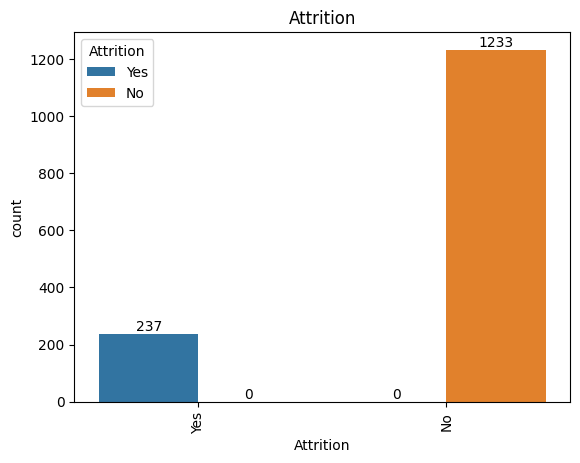

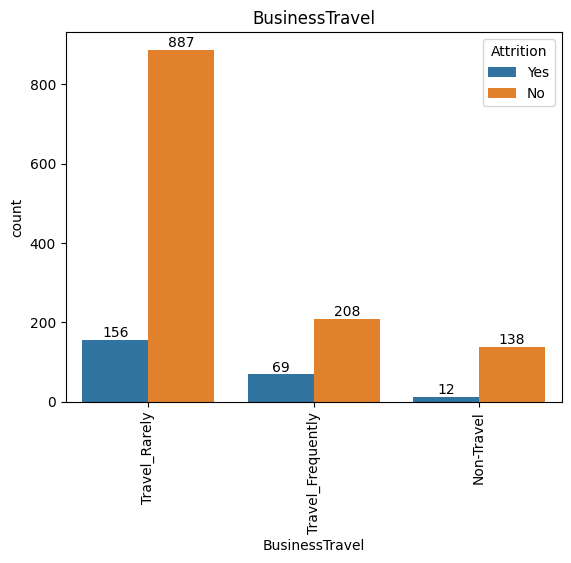

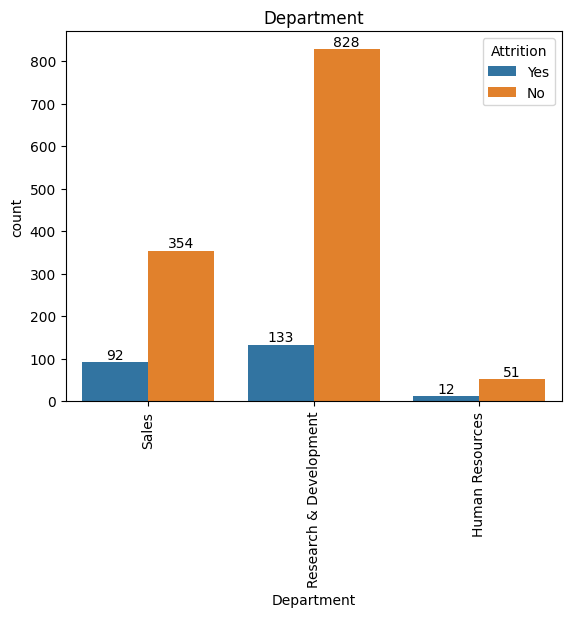

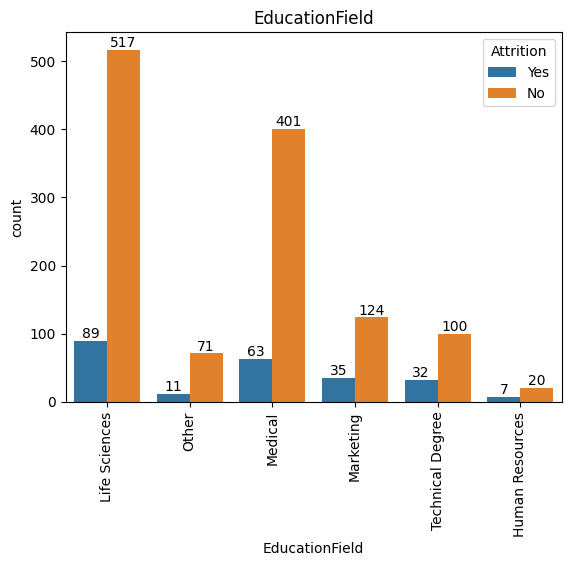

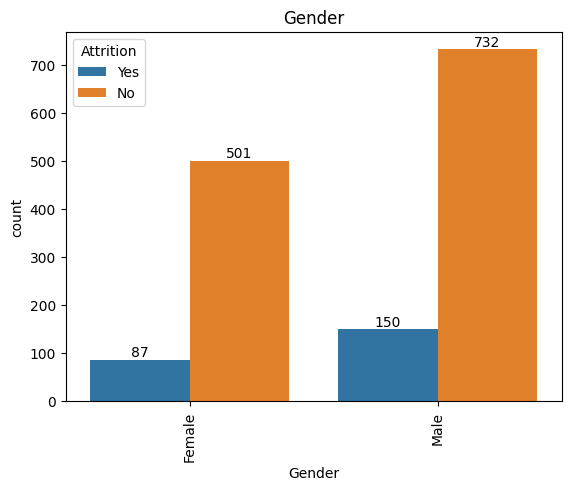

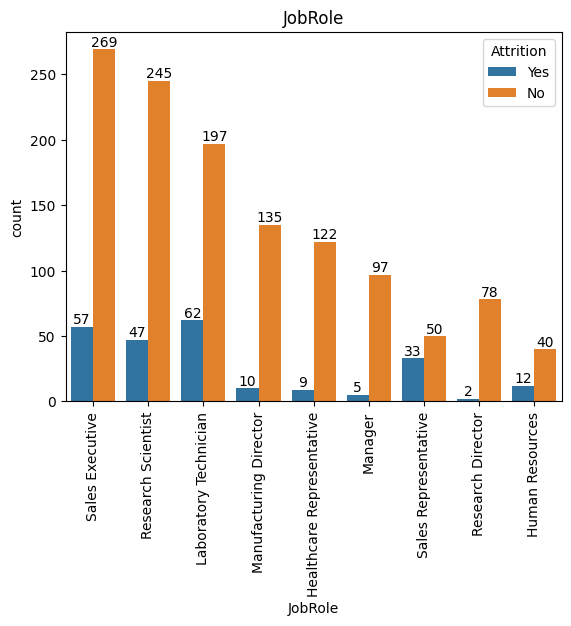

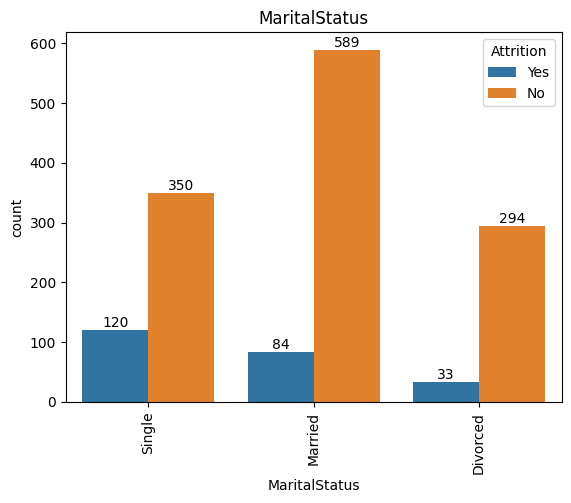

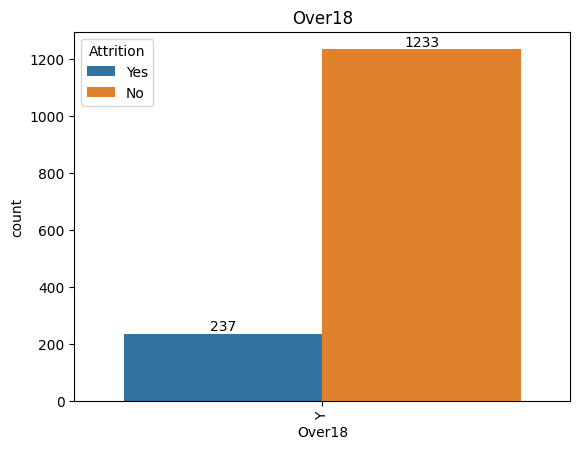

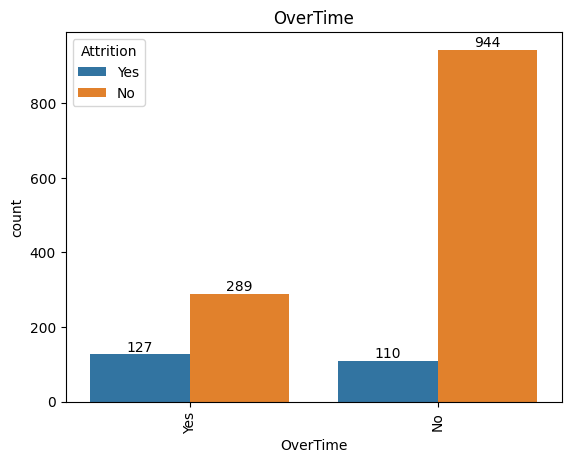

In [16]:
for i in df[cat_features]:
    plt.figure()
    ax=sns.countplot(df,x=i,hue='Attrition')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

The attrition rate is approximately 16.12%.

- Frequent business travel is a significant factor contributing to higher **attrition** rates.

- Among departments, the **Sales department** has the highest **attrition** rate, whereas **Research & Development** exhibits the lowest.

- **Male** employees leave the company at a rate approximately 3% higher than **female** employees.

- Employees who work beyond the standard workweek are more likely to leave the company compared to those working regular hours.

- The **attrition rate** among **single** employees is significantly higher than that of **married** or **divorced** employees.

- **Directors** and **Managers** have the lowest attrition rates within the company.

- The **Sales Representative** role experiences the highest **attrition rate** among all job positions.

- Among **education fields**, **Human Resources** has the highest attrition rate, while **Medical** has the lowest.

## Numerical Analytics

In [17]:
num_features=df.select_dtypes(exclude=object).columns
df[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [18]:
print('Number of unique values for each numerical feature')
for i in num_features:
    print(f'{i}: {df[i].nunique()}')

Number of unique values for each numerical feature
Age: 43
DailyRate: 886
DistanceFromHome: 29
Education: 5
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobSatisfaction: 4
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


- **StandardHours** and **EmployeeCount** features most be deleted for ml models since all of theire rows are identical.

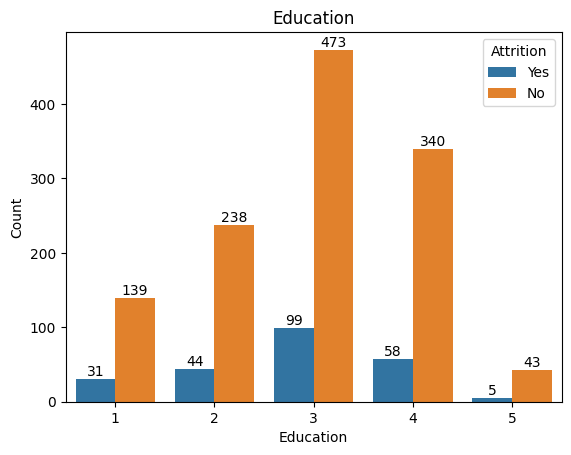

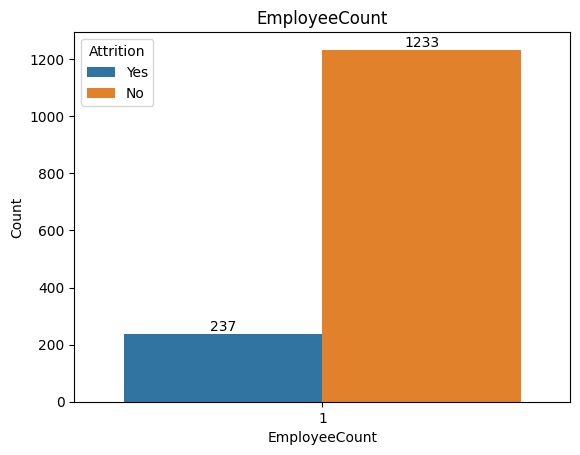

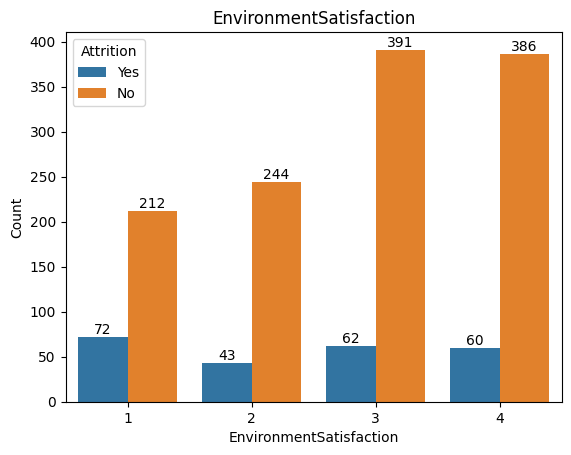

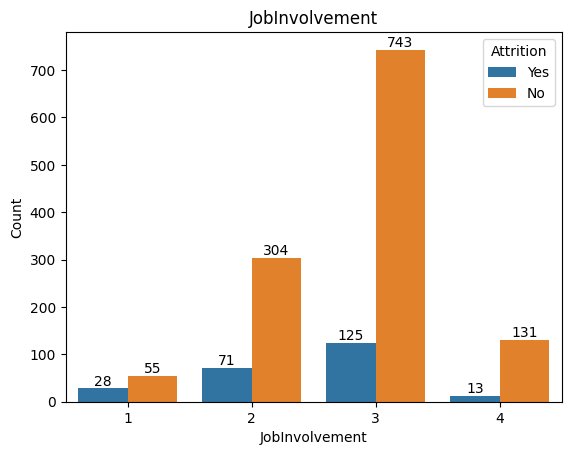

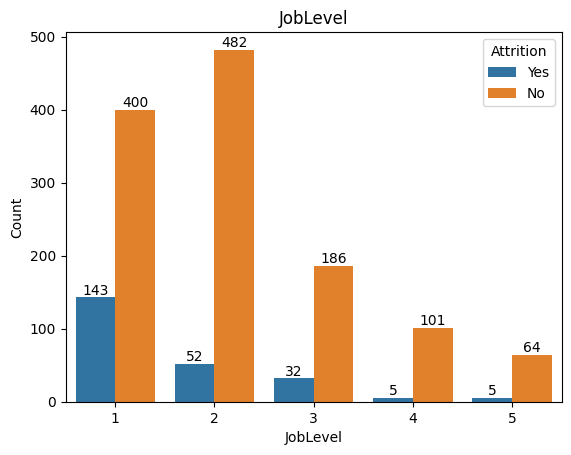

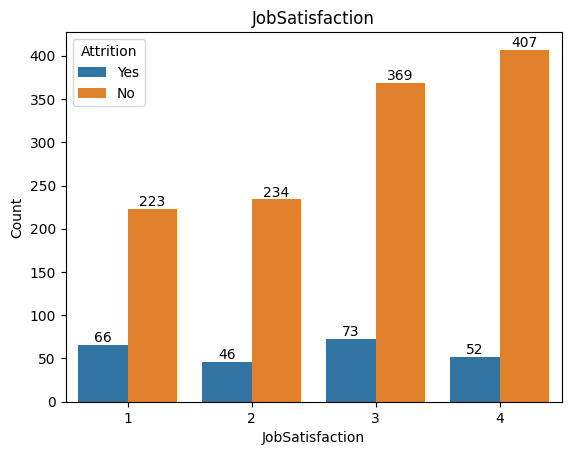

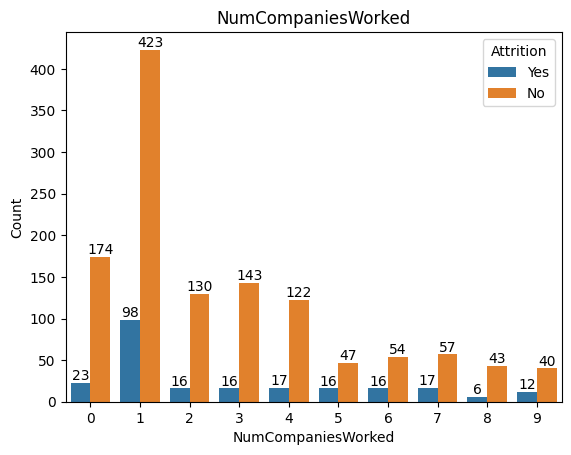

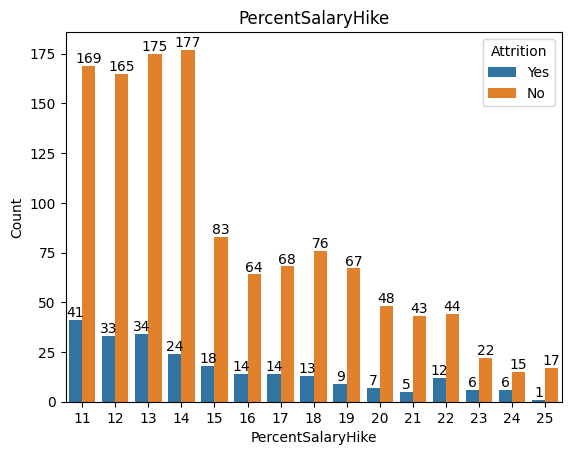

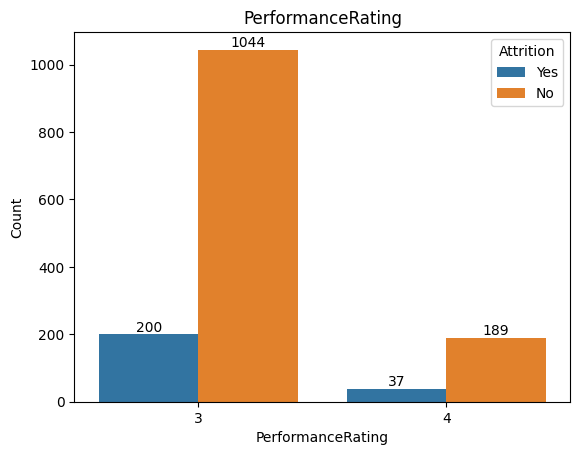

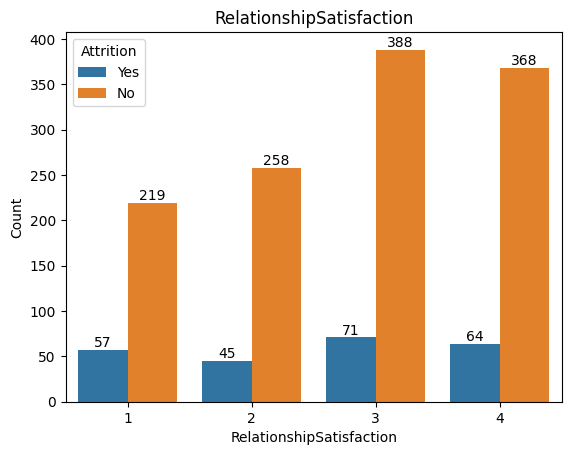

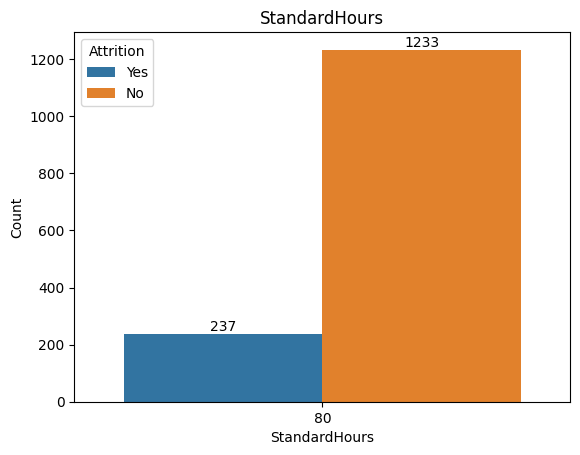

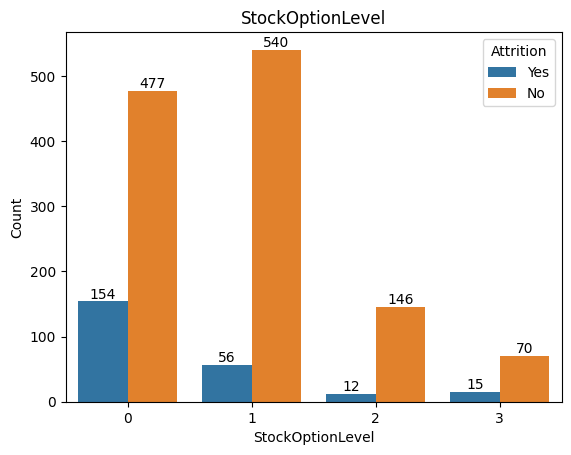

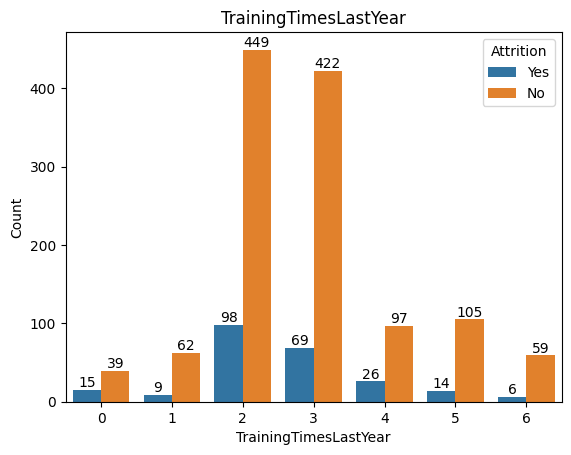

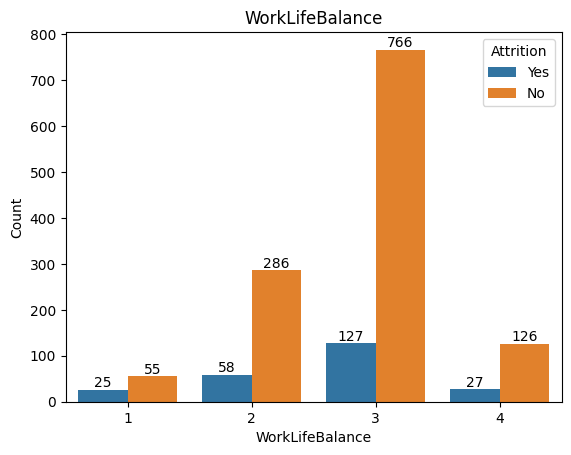

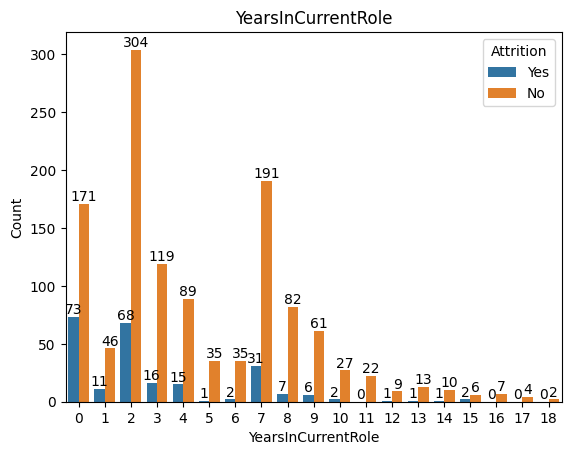

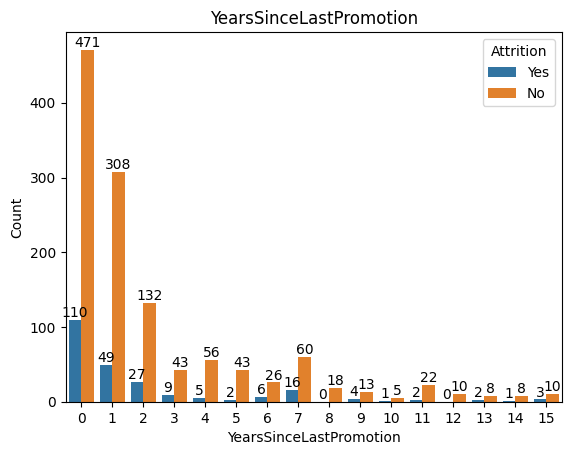

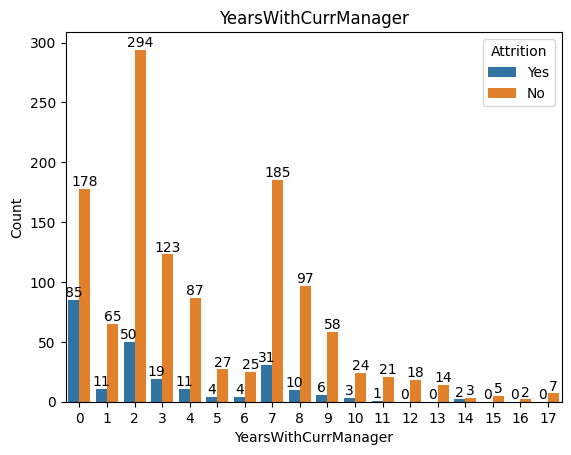

In [19]:
#First let's analyse features wich are discrete and have the least number of unique values
for i in num_features:
    if (df[i].nunique()<=20):
        plt.figure()
        ax=sns.countplot(data=df,x=i,hue='Attrition')
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(i)
        plt.ylabel('Count')
        plt.xlabel(i)
        plt.show()

- **Attrition** for employees who have worked with their current manager for less than a year is the highest, whereas those who have been with their current manager for over 10 years have a significantly lower attrition rate.

- Employees with less than a year since their last promotion are more likely to leave the company.

- Employees who have spent less than a year in their current role are more likely to leave the company.

- Employees with a **work-life balance** index of 1 are highly prone to leaving the company.

- Employees with **0 or 4 training sessions last year** have the highest attrition ratio among all groups, whereas employees with **6 training sessions last year** have the lowest attrition ratio.

- Employees with a **stock option level** of 0 or 3 have the highest **attrition ratio**, while those with levels 1 and 2 have the lowest.

- Since the **standard working hours** are the same for all employees, this metric does not provide meaningful insights.

- Higher **relationship satisfaction** is associated with lower attrition rates overall.

- Increasing the **percent salary hike** can help reduce the **attrition rate**.

- Employees who have worked for **2 to 5 companies** before **IBM** and those for whom this is their first job have the lowest **attrition ratio**. However, employees who have worked for more than 5 companies or whose current company is only their second job are more likely to leave.

- In general, as **job level** or **job satisfaction** increases, the **attrition ratio** decreases, though there may be exceptions.

- Employees with lower **job involvement** are more likely to leave the company. Notably, the attrition ratio for employees with a **job involvement** score of 1 is approximately **34%**.

- As **environment satisfaction** increases, the **attrition ratio** decreases.

- The lowest **attrition ratio** is observed for employees with **education level 5**.

- The **employeeCount** column indicates that the data is computed for each employee separately, so it is not necessary for our analysis.


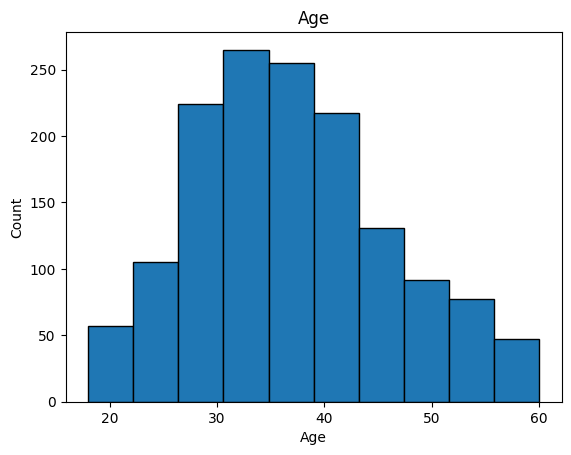

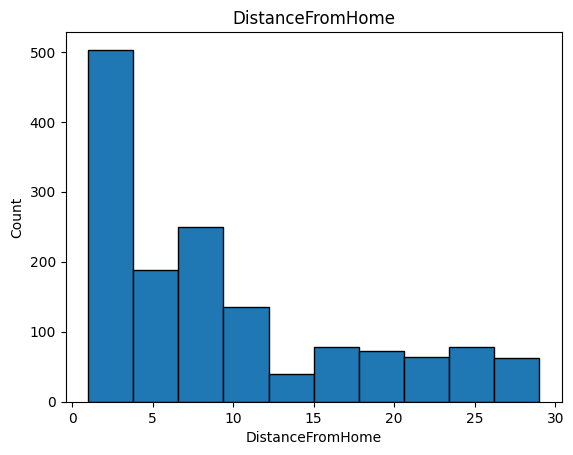

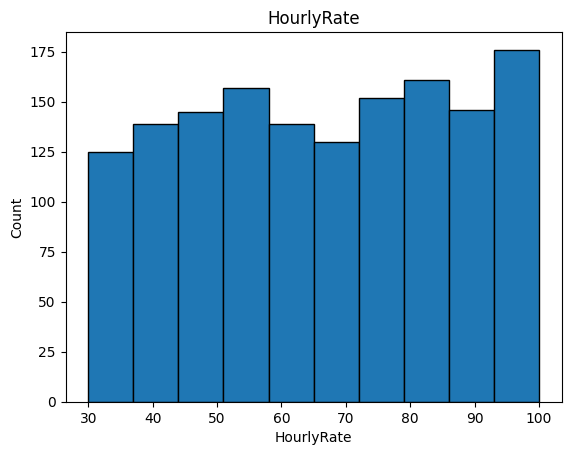

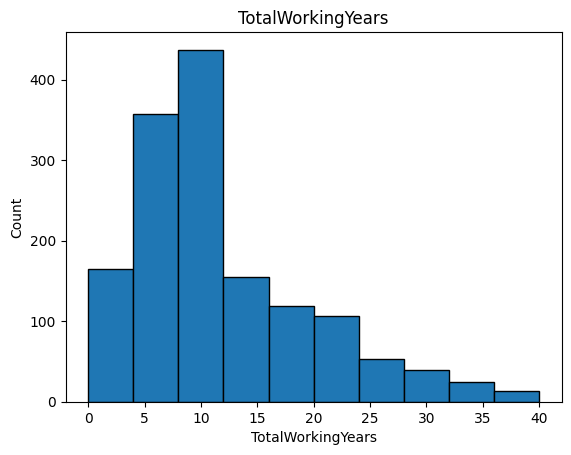

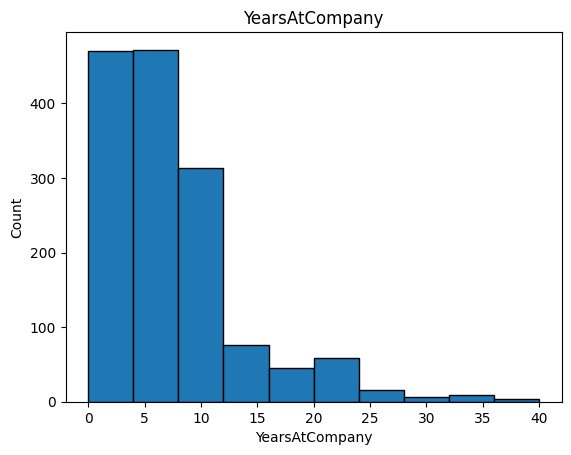

In [20]:
#Analyse the features with more unique values

for i in num_features:
    if (df[i].nunique()>20 and df[i].nunique()<=100 ):
        plt.figure()
        plt.hist(df[i],edgecolor='black')
        plt.title(i)
        plt.ylabel('Count')
        plt.xlabel(i)
        plt.show()


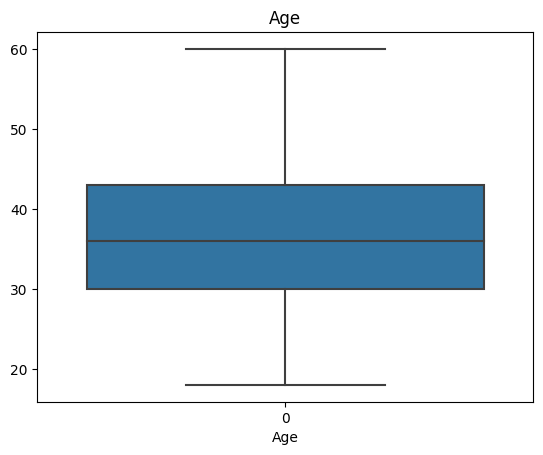

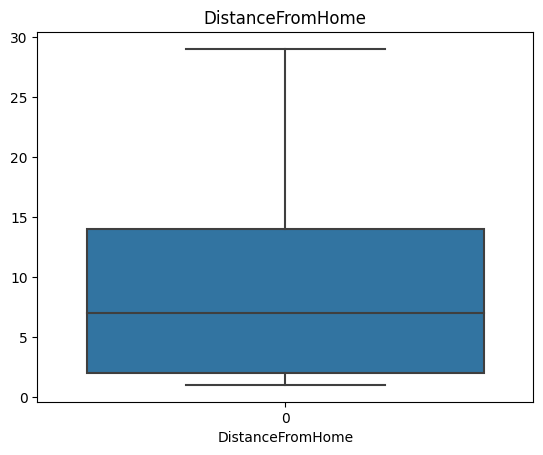

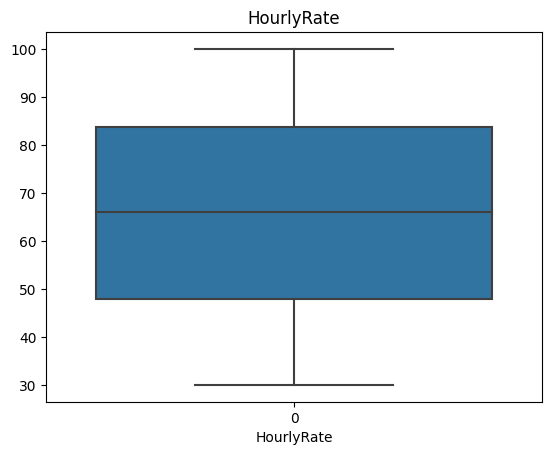

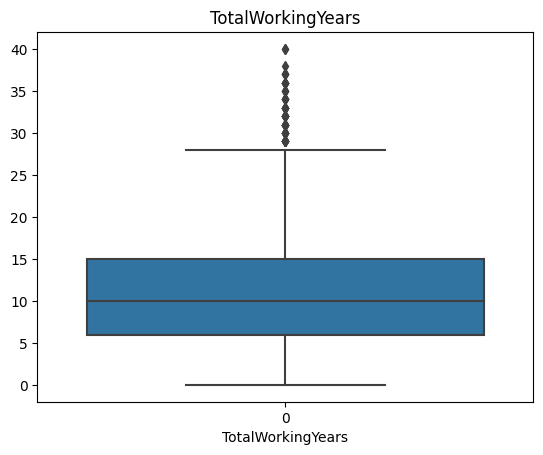

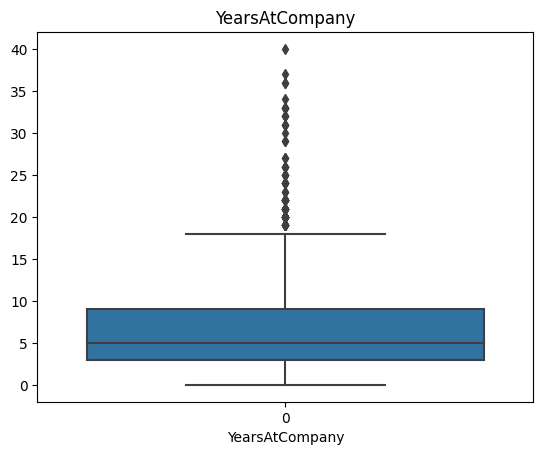

In [21]:
#Let's check for outlayers and skewness of the data

for i in num_features:
    if (df[i].nunique()>20 and df[i].nunique()<=100 ):
        plt.figure()
        sns.boxplot(df[i])
        plt.title(i)
        plt.xlabel(i)
        plt.show()

- As obviouse we have outlaiers for **YearsAtCompany** and **TotalWorkingYears**

In [22]:
#Let's check for outlayers and skewness of the data

for i in num_features:
    if (df[i].nunique()>20 and df[i].nunique()<=100 ):
        print(f'{i}: {df[i].skew()}')

Age: 0.4132863018563338
DistanceFromHome: 0.9581179956568269
HourlyRate: -0.03231095290044941
TotalWorkingYears: 1.1171718528128527
YearsAtCompany: 1.7645294543422088


- We need to take care of above skewness of the data

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


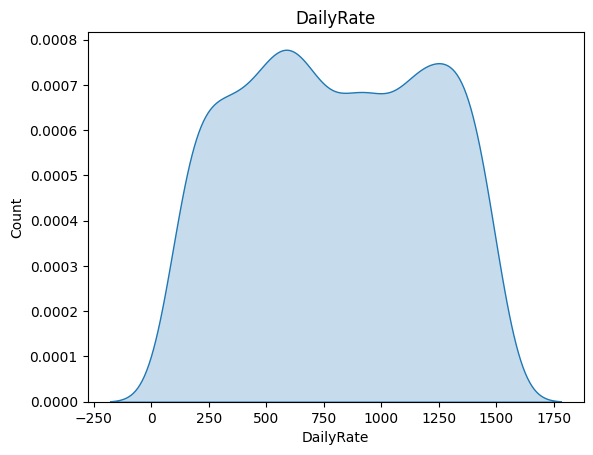

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


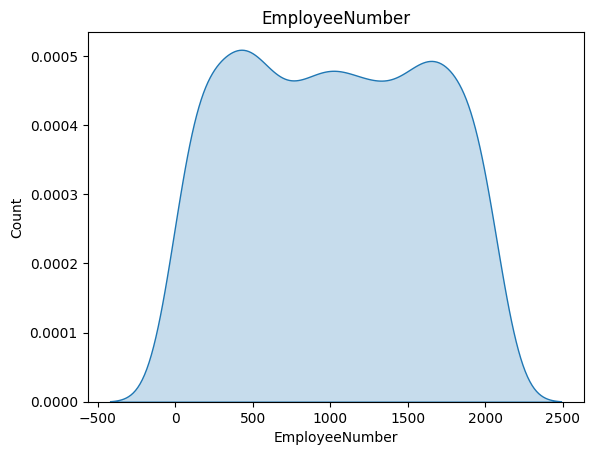

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


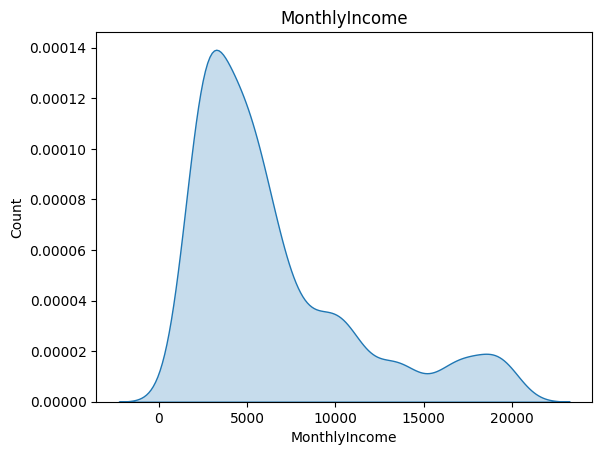

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


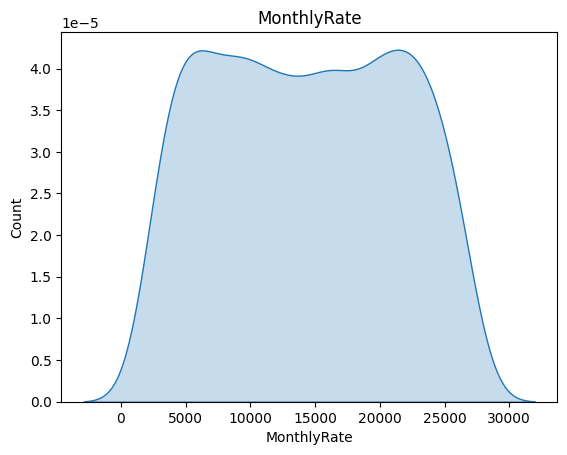

In [23]:
#Analyse the features wich are almost continuous
for i in num_features:
    if (df[i].nunique()>100 ):
        plt.figure()
        sns.kdeplot(df[i],fill=True)
        plt.title(i)
        plt.ylabel('Count')
        plt.xlabel(i)
        plt.show()


- **MonthlyIncome** is skewed and log transformation can be a good choice

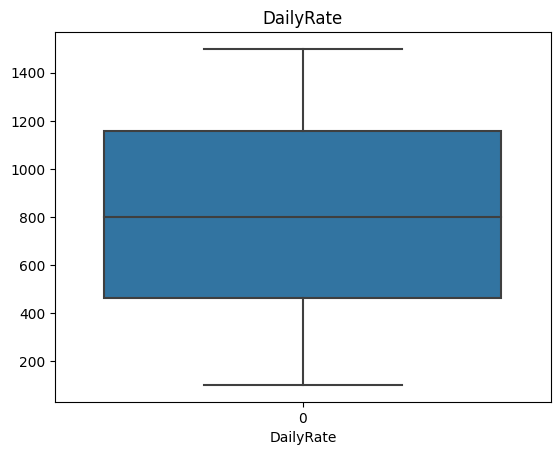

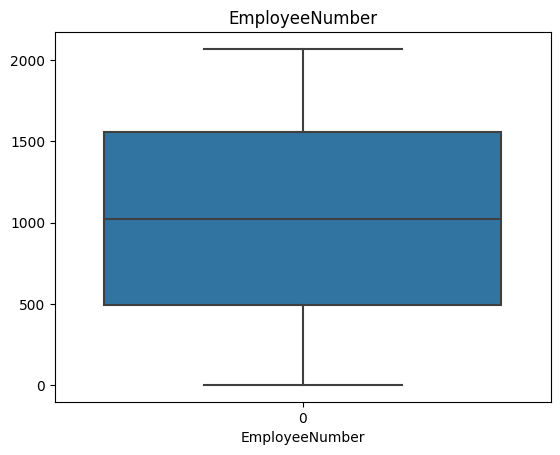

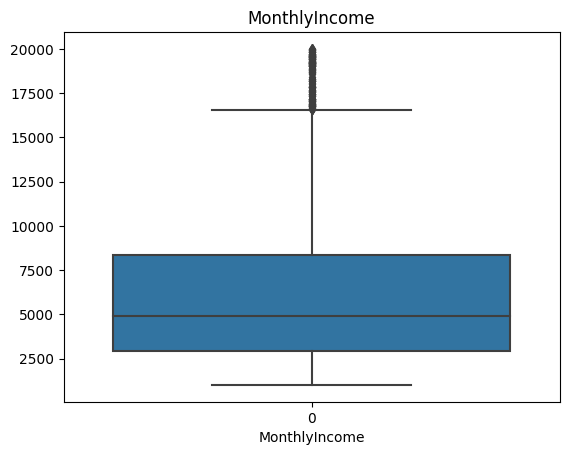

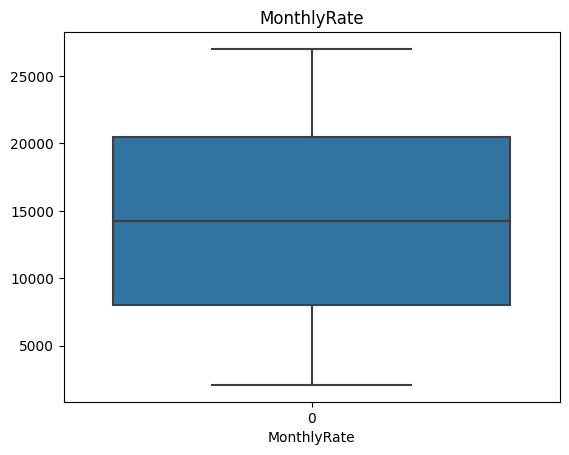

In [25]:
#Know we check for outliers
for i in num_features:
    if (df[i].nunique()>100 ):
        plt.figure()
        sns.boxplot(df[i])
        plt.title(i)
        plt.xlabel(i)
        plt.show()


- Only the **MonthlyIncome** feature has outliers.

In [26]:
#Let's check the skewness
for i in num_features:
    if (df[i].nunique()>100 ):
        print(f'{i}: {df[i].skew()}')

DailyRate: -0.003518568352325864
EmployeeNumber: 0.016574019580105036
MonthlyIncome: 1.3698166808390664
MonthlyRate: 0.01857780789113246


- As we see just the **MonthlyIncome** feature is skewed.

In [27]:
df=data.copy()
df['Age_bins']=pd.cut(df['Age'],bins=[17,28,38,48,np.inf],labels=[1,2,3,4])
df.drop(columns=['Age'],inplace=True)
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bins
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,3
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,4
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,2
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,2
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,1


In [28]:
#First we need to encode categorical features so we can test theier importance using different approuches

cat=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
encoder_trans=ColumnTransformer(
    [
        ('encoder',OrdinalEncoder(),cat)
    ],remainder='passthrough'
)

cat_transformed=pd.DataFrame(encoder_trans.fit_transform(df),columns=encoder_trans.get_feature_names_out())

## Feature engineering and feature selection

<h5>Chi2 Test</h5>

In [29]:
#Checking the importance of discrete columns in the datafram using chi2 test

discrete_columns=[i for i  in cat_transformed.columns if cat_transformed[i].nunique()<=100]
X = cat_transformed[discrete_columns]
y = cat_transformed['encoder__Attrition'] 

# Apply Chi-Squared test
chi2_selector = SelectKBest(score_func=chi2, k='all')  
X_selected = chi2_selector.fit_transform(X, y)

# Retrieve feature importance scores
scores = chi2_selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': np.round(scores,3)})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)

feature_scores


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Feature,Chi2 Score
0,encoder__Attrition,1233.000
23,remainder__TotalWorkingYears,230.722
26,remainder__YearsAtCompany,142.100
27,remainder__YearsInCurrentRole,117.523
29,remainder__YearsWithCurrManager,110.672
8,encoder__OverTime,63.845
9,remainder__DistanceFromHome,63.772
22,remainder__StockOptionLevel,25.269
15,remainder__JobLevel,24.939
6,encoder__MaritalStatus,18.746


<h5>Anova Test:</h5>

In [30]:
#Checking the importance of continuous columns in the data frame using Anova test
continuous_columns=[i for i in cat_transformed.columns if i not in discrete_columns]
X = cat_transformed[continuous_columns]  
y = cat_transformed['encoder__Attrition']  

anova_selector = SelectKBest(score_func=f_classif, k='all')  
X_selected = anova_selector.fit_transform(X, y)

scores = anova_selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA Score': scores})


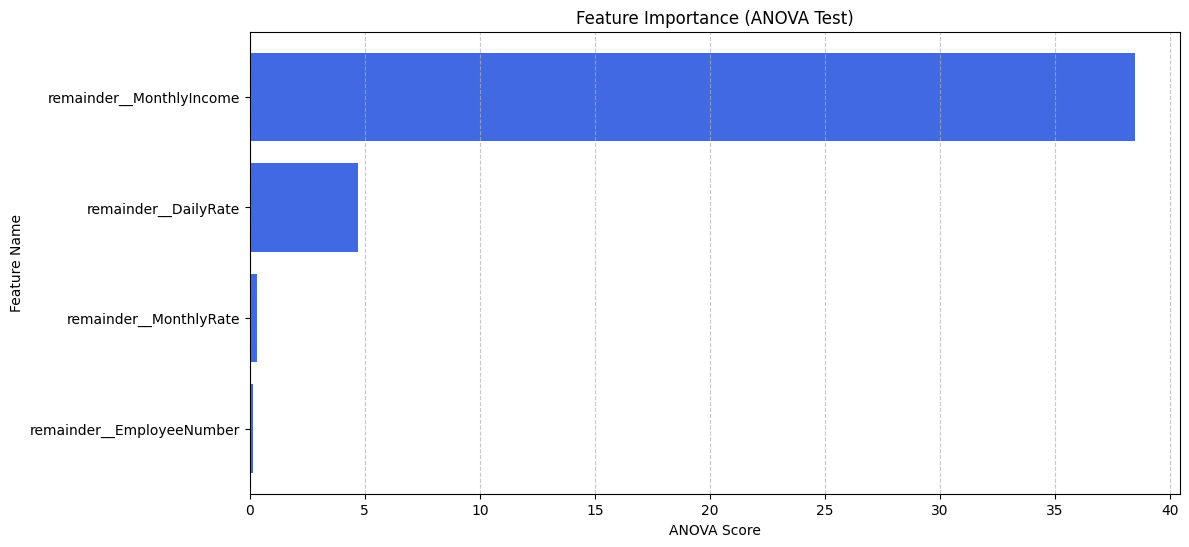

In [31]:
feature_scores=feature_scores.sort_values(by='ANOVA Score',ascending=True)
plt.figure(figsize=(12, 6))
plt.barh(feature_scores['Feature'], feature_scores['ANOVA Score'], color='royalblue')
plt.xlabel('ANOVA Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance (ANOVA Test)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- **Monthly Income** has a significant effect on attrition.

In [32]:
#Find out the feature importance using RandomForestClassifier
X=cat_transformed.drop(columns=['encoder__Attrition'])
y=cat_transformed['encoder__Attrition']
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rnd_clf.feature_importances_})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


# Compute permutation importance
perm_importance = permutation_importance(rnd_clf, X, y, scoring='f1')

# Convert to DataFrame
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': np.round(perm_importance.importances_mean*100,3)})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

print(perm_importance_df)

                                Feature  Importance
7                     encoder__OverTime      20.931
18             remainder__MonthlyIncome       7.101
25          remainder__StockOptionLevel       6.668
9           remainder__DistanceFromHome       4.178
13   remainder__EnvironmentSatisfaction       4.086
16                  remainder__JobLevel       3.587
20        remainder__NumCompaniesWorked       3.496
4                      encoder__JobRole       2.822
5                encoder__MaritalStatus       2.732
26         remainder__TotalWorkingYears       2.510
17           remainder__JobSatisfaction       2.466
8                  remainder__DailyRate       2.289
14                remainder__HourlyRate       2.244
19               remainder__MonthlyRate       2.201
29            remainder__YearsAtCompany       1.980
15            remainder__JobInvolvement       1.717
28           remainder__WorkLifeBalance       1.456
31   remainder__YearsSinceLastPromotion       1.413
21         r

## Conclusion

### **Attrition Analysis**
- **Overall Attrition Rate:** The attrition rate is approximately **16.12%**.
- **Business Travel Impact:** Frequent business travel leads to **higher attrition rates**.
- **Departmental Differences:** The **Sales department** has the highest attrition, while **Research & Development** has the lowest.
- **Gender Impact:** Male employees leave at a rate **3% higher** than female employees.
- **Workload Effect:** Employees working **beyond standard hours** are more likely to leave.
- **Marital Status Influence:** **Single employees** exhibit significantly higher attrition rates.
- **Job Role Effect:** **Directors and Managers** have the lowest attrition, while **Sales Representatives** experience the highest turnover.
- **Education Field Influence:** The **Human Resources** field has the highest attrition, while **Medical** has the lowest.

### **Tenure & Promotions**
- Employees with **less than a year under their current manager** have the highest attrition.
- Employees who **haven't been promoted in the last year** are more likely to leave.
- Employees who **spent less than a year in their current role** exhibit higher attrition.

### **Work-Life Balance & Satisfaction**
- Employees with a **work-life balance index of 1** are highly prone to attrition.
- Employees who had **0 or 4 training sessions last year** have the highest attrition, while **6 training sessions correlate with better retention**.
- **Stock option levels 0 and 3** are linked to higher attrition rates, whereas **levels 1 and 2** show better retention.
- **Higher job satisfaction** reduces attrition.

### **Salary & Experience Influence**
- **Increasing salary hikes** can help reduce attrition.
- Employees with **2 to 5 prior employers** or those in their **first job** show better retention.
- Employees who worked at **more than 5 companies** have a higher turnover risk.
- **Monthly income** is skewed and would benefit from **log transformation**.

### **Feature Selection Insights**
- Features **Over18, EmployeeCount, and StandardHours** should be removed as they provide no predictive value.
- **EmployeeNumber, PerformanceRating, and BusinessTravel** contribute minimally and may cause overfitting.
- **MonthlyIncome** has outliers and requires handling.

### **Final Thoughts**
The analysis highlights key factors driving attrition. **Improving work-life balance, optimizing training programs, adjusting salaries, and enhancing managerial effectiveness** can help **reduce employee turnover**.



## More parts of this notebook will be added
- **Preprocessing**
- **ML Models**
- **More advanced feature engineering**
    